# Chapter 6: Pandas

Now that you are familiar with python, it is time to dive deeper into what you can do with it

<b>Pandas</b> is an open source library providing high-performance, easy-to-use data structures and data analysis tools for Python

It is the most famous open source library for python and data analytics

<a href="https://pandas.pydata.org/pandas-docs/stable/api.html">Here</a> is the API for pandas. 

The first thing we need to do is import the library
You can use a simple import statement 

## Importing pandas

In [1]:
import pandas as pd
#By saying "as pd" we are naming this library pd in our code so we don't have to always use pandas
#You can choose anything other than "pd" also

## Series

A `Series` is a one-dimensional  <b>object</b> similar to an array, list, or column in a table. It will assign a labeled index[0,1...n]
to each item in the Series.

In [2]:
s = pd.Series(['Apple', 'Banana', 43, 65.6, 'Final'])
print(s)
print("The first element is", s[0])

0     Apple
1    Banana
2        43
3      65.6
4     Final
dtype: object
The first element is Apple


In [3]:
test_list = ["2", 4334]
print(type(test_list))

<class 'list'>


<b>Change index in series</b>

In [4]:
s = pd.Series(['Apple', 'Banana', 'Guava', 'Tomato', 'Potato'], index=['1', '2', '3', '4', '5'])
s

1     Apple
2    Banana
3     Guava
4    Tomato
5    Potato
dtype: object

In [5]:
print(s[1])
print(s['1'])

Banana
Apple


You can change index to just about anything. It only depends on how you want to refer to that record

In [6]:
s_new = pd.Series(['Apple', 'Banana', 'Guava', 'Tomato', 'Potato'], index=['Fruit1', 'Fruit2', 'Fruit3', 'Veg1', 'Veg2'])
print(s_new)

Fruit1     Apple
Fruit2    Banana
Fruit3     Guava
Veg1      Tomato
Veg2      Potato
dtype: object


<b>You can use the index to select specific items from the Series ...</b>

In [ ]:
print(s_new['Veg1'])
#However, using s_new[3] will still give the 5th element because 4 is not an index
print(s_new[4])

<b> You can use multiple indices </b>

In [7]:
#There are 2 square brackets here because you are sending in a list [a,b,c] to a series 
#So it's the equivalent of s_new[list]
s_new[['Fruit1', 'Fruit2', 'Fruit3']]

Fruit1     Apple
Fruit2    Banana
Fruit3     Guava
dtype: object

The `Series` constructor can convert a dictonary as well, using the keys of the dictionary as its index.

In [8]:
dictionary = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(dictionary)
cities

Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64

<b> You can use boolean indexing for selection. </b>

In [9]:
cities[cities < 1000]

Austin      450.0
Portland    900.0
dtype: float64

You can also change the values in a Series on the fly.

In [10]:
# changing based on the index
print('Old value:', cities['Chicago'])
cities['Chicago'] = 1400
print('New value:', cities['Chicago'])

Old value: 1000.0
New value: 1400.0


What if you aren't sure whether an item is in the Series? You can check using the following statement.

In [11]:
print('Seattle' in cities)
print('San Francisco' in cities)

#You can also store in a variable like this
is_seattle_in_cities = 'Seattle' in cities
print(is_seattle_in_cities)

False
True
False


## PIT STOP

Here, let us revise what we've gone through with Series 

In [12]:
#Create a new dictionary using the name:height of the guy/girl on your left or guy/girl on your right and your name:height
#E.g.  {"Shubham": 183, "Gabriel": 144}

name_dict = {"Shubham": 183, "Gabriel": 144}

In [13]:
#Now convert this dictionary into a pandas series
series = pd.Series(name_dict)

In [15]:
#Print the name of the person who is taller
maximum = max(name_dict.values())
maximum

183

In [ ]:
#Print the height of the people who are below 150cm

In [ ]:
#Check if "Kim" is in your series

## DataFrames

<img src="images/dataFrame.jpg"/>

A `DataFrame` (Table) is made up of a few components

* index - Think of it like column that contains the id for the row. In this data set, there is no index
* column


In [16]:
#DataFrame({col1: {row1: value11, row2: value12},
#           col2: {row2: value21, row2: value22}})
df = pd.DataFrame({
        'A': {0: 'a', 1: 'b', 2: 'c'},
        'B': {0: 1, 1: 3, 2: 5},
        'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


But don't worry! You will never have to create a DataFrame from scratch
You will generally have to upload it from a CSV or an Excel file
So let's learn how to do that

In [17]:
# You will be using this data in your exercise later on...
sal_df = pd.read_csv("data/Salaries.csv")
sal_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [19]:
#To read from an Excel file
df = pd.read_excel('data/enrollment.xlsx')
df

,year,school,course_type,course_name,gender,no_of_students
0,2017,School of Business & Accountancy,Full-time,Diploma in Accountancy,Female,468.0
1,2017,School of Business & Accountancy,Full-time,Diploma in Accountancy,Male,404.0
2,2017,School of Business & Accountancy,Full-time,Diploma in Banking & Financial Services,Female,126.0
3,2017,School of Business & Accountancy,Full-time,Diploma in Banking & Financial Services,Male,180.0
4,2017,School of Business & Accountancy,Full-time,Diploma in Business Information Technology,Female,68.0
5,2017,School of Business & Accountancy,Full-time,Diploma in Business Information Technology,Male,106.0
6,2017,School of Business & Accountancy,Full-time,Diploma in Business Studies,Female,492.0
7,2017,School of Business & Accountancy,Full-time,Diploma in Business Studies,Male,403.0
8,2017,School of Business & Accountancy,Full-time,Diploma in International Business,Female,68.0
9,2017,School of Business & Accountancy,Full-time,Diploma in International Business,Male,61.0


In [24]:
#Get the number of rows and columns in the DataFrame
print(df.shape)

#TUPLE

print(df.columns)

#To get number of rows,
print(df.shape[0])

(166, 6)
Index(['year', 'school', 'course_type', 'course_name', 'gender',
       'no_of_students'],
      dtype='object')
166


## FUNCTIONS

The first thing a user does when he uploads a CSV/Excel file is get a feel at what data he's dealing with. 
So we print the data, but I don't need all the rows.
So I'll use a function called `.head()`

In [20]:
#df.head() prints the top 5 rows of data
df.head()

,year,school,course_type,course_name,gender,no_of_students
0,2017,School of Business & Accountancy,Full-time,Diploma in Accountancy,Female,468.0
1,2017,School of Business & Accountancy,Full-time,Diploma in Accountancy,Male,404.0
2,2017,School of Business & Accountancy,Full-time,Diploma in Banking & Financial Services,Female,126.0
3,2017,School of Business & Accountancy,Full-time,Diploma in Banking & Financial Services,Male,180.0
4,2017,School of Business & Accountancy,Full-time,Diploma in Business Information Technology,Female,68.0


In [ ]:
#You can also specify the number of rows that you want!
df.head(3)

After that, we would want to see as much information as possible about the datatypes and number of records

For this, we will use `df.info()`

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 6 columns):
year              166 non-null int64
school            166 non-null object
course_type       166 non-null object
course_name       166 non-null object
gender            166 non-null object
no_of_students    165 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 7.9+ KB


Now we see there is 1 column which has a null value.<br/>
 

So we want to drop that record because it will spoil our analysis<br/>
So we will use a function called `df.dropna()`

In [26]:
df.dropna(inplace=True)

#inplace=True means change the current object and don't create a new one
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 165
Data columns (total 6 columns):
year              165 non-null int64
school            165 non-null object
course_type       165 non-null object
course_name       165 non-null object
gender            165 non-null object
no_of_students    165 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.0+ KB


Now we will see summary statistics of the numerical columns in the dataFrame<br/>
Use `df.describe()`

In [27]:
df.describe()

,year,no_of_students
count,165.0,165.000000
mean,2017.0,99.993939
std,0.0,148.693559
min,2017.0,1.000000
25%,2017.0,16.000000
50%,2017.0,54.000000
75%,2017.0,110.000000
max,2017.0,1236.000000


You can also use statistics functions on various numerical columns to get the values

In [28]:
mean = df['no_of_students'].mean()
std_dev = df['no_of_students'].std()
min = df['no_of_students'].min()
max = df['no_of_students'].max()
p25 = df['no_of_students'].quantile(0.25)

print(mean, std_dev, min, max, p25)


99.9939393939394 148.69355854672725 1.0 1236.0 16.0


In [31]:
#Calculate the inter-quartile range in df['no_of_students']
p25 = df['no_of_students'].quantile(0.25)
p75 = df ['no_of_students'].quantile(0.75)
interquaritle_range = p75-p25
print (interquaritle_range)

94.0


## Common Operations on DataFrames

** Accessing a table **

In [33]:
df['year']

0    2017
1    2017
2    2017
3    2017
4    2017
Name: year, dtype: int64

In [34]:
type(df['year'])

pandas.core.series.Series

In [ ]:
# table_variable['column_name']

df['year'].head(5)


In [35]:
#accessing multiple columns
df[['year', 'no_of_students']].head()

,year,no_of_students
0,2017,468.0
1,2017,404.0
2,2017,126.0
3,2017,180.0
4,2017,68.0


In [38]:
#Get all unique course_types
print(df['course_type'].unique())

['Full-time' 'Part-time diploma' 'Part-time advanced diploma'
 'Part-time specialist diploma' 'Part-time skills-based module'
 'Part-time diploma conversion']


<b>Boolean Indexing in DataFrames</b>

In [ ]:
#Get all records where course name is Diploma in Banking & Financial Services
df[df['course_name']=='Diploma in Banking & Financial Services']

Exercise: Get number of students in part-time and full-time


In [39]:
full_time_students = df[df['course_type']=='Full-time']
full_time_students.head()

,year,school,course_type,course_name,gender,no_of_students
0,2017,School of Business & Accountancy,Full-time,Diploma in Accountancy,Female,468.0
1,2017,School of Business & Accountancy,Full-time,Diploma in Accountancy,Male,404.0
2,2017,School of Business & Accountancy,Full-time,Diploma in Banking & Financial Services,Female,126.0
3,2017,School of Business & Accountancy,Full-time,Diploma in Banking & Financial Services,Male,180.0
4,2017,School of Business & Accountancy,Full-time,Diploma in Business Information Technology,Female,68.0


In [40]:
#Get no_of_Students column
full_time_students['no_of_students']

0     468.0
1     404.0
2     126.0
3     180.0
4      68.0
5     106.0
6     492.0
7     403.0
8      68.0
9      61.0
11    158.0
12    191.0
13     56.0
14    170.0
15     93.0
16     53.0
17     75.0
18    118.0
19    118.0
20     57.0
21     87.0
22     50.0
23    224.0
24     54.0
25    386.0
26     72.0
27     80.0
28     42.0
29    295.0
30    100.0
      ...  
70    520.0
71     36.0
72    137.0
73     50.0
74     29.0
75      2.0
76     68.0
77     30.0
78     87.0
79    165.0
80     34.0
81    110.0
82     74.0
83    317.0
84     43.0
85     77.0
86    138.0
87    112.0
88    108.0
89    218.0
90     50.0
91     67.0
92     77.0
93     45.0
94     86.0
95     46.0
96     73.0
97     38.0
98     92.0
99     23.0
Name: no_of_students, Length: 99, dtype: float64

In [41]:
#get Sum
full_time_students['no_of_students'].sum()

14448.0

In [ ]:
full_time_sum = df[df['course_type']=='Full-time']['no_of_students'].sum()
part_time_sum = df[df['course_type']=='Part-time diploma']['no_of_students'].sum()

print(full_time_sum, part_time_sum)

In [43]:
#Exercise for you:Find number of students in School Of Engineering
engineering_sum = df[df["school"]=="School of Engineering"]['no_of_students'].sum()
print(engineering_sum)

4350.0


**Modifying a Column**

In this example, we are setting the `no_of_students` to a fixed value of 5

In [44]:
new_df= df.copy()

#.copy() basically creates a new DF so that we don't keep editting the original DF

new_df['no_of_students'] = 5

new_df.head(5)


,year,school,course_type,course_name,gender,no_of_students
0,2017,School of Business & Accountancy,Full-time,Diploma in Accountancy,Female,5
1,2017,School of Business & Accountancy,Full-time,Diploma in Accountancy,Male,5
2,2017,School of Business & Accountancy,Full-time,Diploma in Banking & Financial Services,Female,5
3,2017,School of Business & Accountancy,Full-time,Diploma in Banking & Financial Services,Male,5
4,2017,School of Business & Accountancy,Full-time,Diploma in Business Information Technology,Female,5


We can use existing columns. Like in excel where you have a formula for cell `C1` as

```
= A1 + B1
```

In pandas you would have

```
df['C'] = df['A'] + df['B']
```

Where the formula applies to the entire column

In [45]:
new_df = df.copy()

# In this example, you are adding 1 to the existing no_of_students column

print(df.head()[['course_name', 'no_of_students']])

new_df['no_of_students'] = new_df['no_of_students'] + 1
print("\n")

print(new_df.head()[['course_name', 'no_of_students']])

                                  course_name  no_of_students
0                      Diploma in Accountancy           468.0
1                      Diploma in Accountancy           404.0
2     Diploma in Banking & Financial Services           126.0
3     Diploma in Banking & Financial Services           180.0
4  Diploma in Business Information Technology            68.0


                                  course_name  no_of_students
0                      Diploma in Accountancy           469.0
1                      Diploma in Accountancy           405.0
2     Diploma in Banking & Financial Services           127.0
3     Diploma in Banking & Financial Services           181.0
4  Diploma in Business Information Technology            69.0


<b> Sorting values </b>

In [46]:
#Sort df according to no_of_students
new_df = df.copy()
new_df.sort_values(['no_of_students'], ascending=False, inplace=True)
new_df.head()

,year,school,course_type,course_name,gender,no_of_students
56,2017,School of Health Sciences,Full-time,Diploma in Health Sciences (Nursing),Female,1236.0
45,2017,School of Engineering,Full-time,Diploma in Mechanical Engineering,Male,546.0
37,2017,School of Engineering,Full-time,Diploma in Electronic & Computer Engineering,Male,539.0
64,2017,School of Humanities & Social Sciences,Full-time,Diploma in Child Psychology & Early Education,Female,529.0
70,2017,School of Humanities & Social Sciences,Full-time,Diploma in Early Childhood Education,Female,520.0


<b>Let's play around with sal_df now</b>

** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [47]:
sal_df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [48]:
lowest = sal_df['TotalPayBenefits'].min()
lowest

-618.13

In [49]:
sal_df[sal_df['TotalPayBenefits'] == lowest]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [50]:
sal_df[sal_df['TotalPayBenefits'] == lowest]['EmployeeName']

148653    Joe Lopez
Name: EmployeeName, dtype: object

In [55]:
sal_df['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

In [52]:
len(sal_df['JobTitle'].unique())

2159

In [53]:
sal_df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Saving a Dataframe

## Saving to a csv file

Note: Do not forget to add the ".csv"

In [57]:
df.to_csv('data/new_csv.csv', encoding='utf-8')

## Saving to an Excel Workbook

In [ ]:
from pandas import ExcelWriter
writer = ExcelWriter('data/updated_xlsx.xlsx')
df.to_excel(writer, 'Sheet1')
writer.save()

## Saving to a Python dictionary

In [58]:
dictionary = df.to_dict()
dictionary

{'course_name': {0: 'Diploma in Accountancy',
  1: 'Diploma in Accountancy',
  2: 'Diploma in Banking & Financial Services',
  3: 'Diploma in Banking & Financial Services',
  4: 'Diploma in Business Information Technology',
  5: 'Diploma in Business Information Technology',
  6: 'Diploma in Business Studies',
  7: 'Diploma in Business Studies',
  8: 'Diploma in International Business',
  9: 'Diploma in International Business',
  11: 'Diploma in International Logistics & Supply Chain Management',
  12: 'Diploma in Tourism & Resort Management',
  13: 'Diploma in Tourism & Resort Management',
  14: 'Diploma in Hotel & Leisure Facilities Management',
  15: 'Diploma in Hotel & Leisure Facilities Management',
  16: 'Diploma in Product Design & Innovation',
  17: 'Diploma in Product Design & Innovation',
  18: 'Diploma in Real Estate Business',
  19: 'Diploma in Real Estate Business',
  20: 'Diploma in Sustainable Urban Design & Engineering',
  21: 'Diploma in Sustainable Urban Design & Engin

<b> Fun exercise! Let's plot a simple GRAPH </b>

C:\Users\smart\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


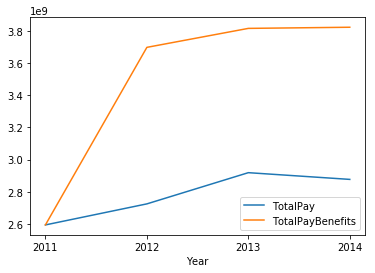

In [60]:
import matplotlib.pyplot as plt
sal_df_copy = sal_df.copy()

sal_df_copy_grouped = sal_df_copy.groupby('Year').sum().reset_index()
sal_df_copy_grouped.plot(kind='line', x='Year', y=['TotalPay', 'TotalPayBenefits'], xticks=sal_df_copy_grouped['Year'])


In [61]:
sal_df_copy_grouped

,Year,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Notes,Status
0,2011,653754720,2.299566e+09,1.638388e+08,1.307901e+08,0.000000e+00,2.594195e+09,2.594195e+09,0.0,0.0
1,2012,2005309555,2.405835e+09,1.846910e+08,1.343223e+08,9.720918e+08,2.724848e+09,3.696940e+09,0.0,0.0
2,2013,3449541971,2.576381e+09,1.986214e+08,1.436538e+08,8.961163e+08,2.918656e+09,3.814772e+09,0.0,0.0
3,2014,4940473939,2.537369e+09,2.059186e+08,1.336232e+08,9.449548e+08,2.876911e+09,3.821866e+09,0.0,0.0


### Additional things you can self learn

1. Pivot (df.pivot)
2. Plotting charts (matplotlib library)
3. Group by